In [12]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
import numpy as np
import pandas as pd
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score
import scikitplot
%matplotlib inline

In [2]:
# Note that the iris dataset is available in sklearn by default.
# This data is also conveniently preprocessed.
iris = datasets.load_iris()
X = iris["data"]
Y = iris["target"]

In [3]:
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


Model      :  <class 'sklearn.linear_model.logistic.LogisticRegression'>
Parameters :  {}
Accuracy score of LogisticRegression: 0.9533333333333335
Model      :  <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'>
Parameters :  {'loss': 'log', 'penalty': 'l2', 'max_iter': 10000}
Accuracy score of SGDClassifier: 0.96


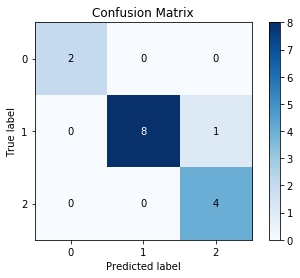

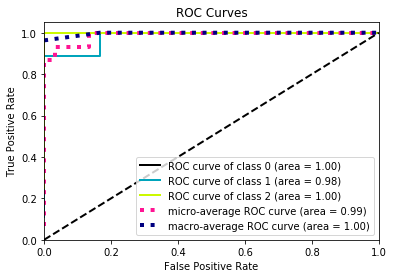

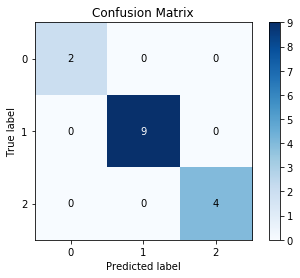

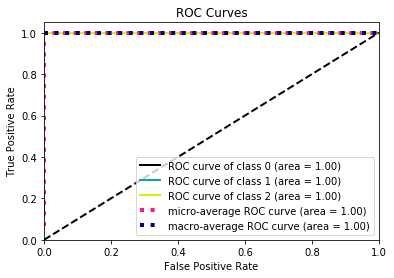

In [14]:
numFolds = 10
kf = KFold(len(X), numFolds, shuffle=True)

# These are "Class objects". For each Class, find the AUC through
# 10 fold cross validation.
Models = [LogisticRegression, SGDClassifier]
#params = [{}, {"loss": "log", "penalty": "l2"}]
params = [{}, {"loss": "log", "penalty": "l2", 'max_iter':10000}]
for param, Model in zip(params, Models):
    total = 0
    print('Model      : ',Model)
    print('Parameters : ',param)
    for train_indices, test_indices in kf:

        train_X = X[train_indices, :] 
        train_Y = Y[train_indices]
        test_X = X[test_indices, :]
        test_Y = Y[test_indices]

        reg = Model(**param)
        reg.fit(train_X, train_Y)
        predictions = reg.predict(test_X)
        pred_proba = reg.predict_proba(test_X)
        total += accuracy_score(test_Y, predictions)
    accuracy = total / numFolds
    print("Accuracy score of {0}: {1}".format(Model.__name__, accuracy))
    scikitplot.metrics.plot_confusion_matrix(test_Y,predictions)
    scikitplot.metrics.plot_roc(test_Y,pred_proba)